In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

## HW : PCA from scratch
- iris 데이터에 numpy만을 사용해서 PCA를 해봅시다!
- We can find PCA makes visualization easier!

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.iloc[:,:-1]
label = df.iloc[:,-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Using Covariance Matrix

In [4]:
# Step 1. Center Data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [5]:
# Step 2. Compute Covariance Matrix
cov_matrix = np.cov(X_scaled.T)
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [6]:
# Step 3. Eigenvalue decomposition
# Using np.linalg.eig function
eigvals, eigvecs = np.linalg.eig(cov_matrix)

print("Eigenvalues: \n", eigvals, "\n")
print("Eigenvector: \n",eigvecs,"\n")

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 

Eigenvector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 



In [7]:
# Ratio of explained variance per PC
explained_variances = []
for i in range(len(eigvals)):
    explained_variances.append(eigvals[i] / np.sum(eigvals))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999999 
 [0.7277045209380132, 0.2303052326768066, 0.03683831957627382, 0.005151926808906328]



첫 번째, 두 번째 PC가 이미 variance의 95% 이상을 설명함을 확인할 수 있다!

In [ ]:
# Visualization (Embedding)
projection_matrix = (eigvecs.T[:][:2]).T
X_pca = X_scaled.dot(projection_matrix)

pc1 = X_pca[:,0]
pc2 = X_pca[:,1]
res = pd.DataFrame(pc1, columns=['PC1'])
res['PC2'] = pc2
res['label'] = label
res.head()

,PC1,PC2,label
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


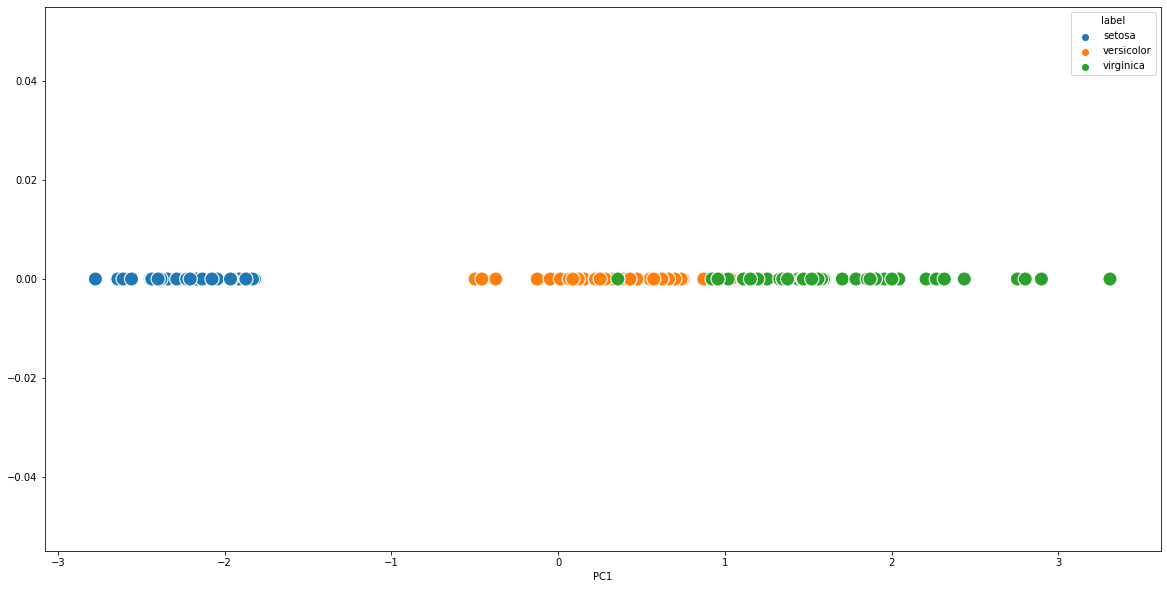

In [ ]:
# Projection on 1-dim subspace
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['label'], s=200)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


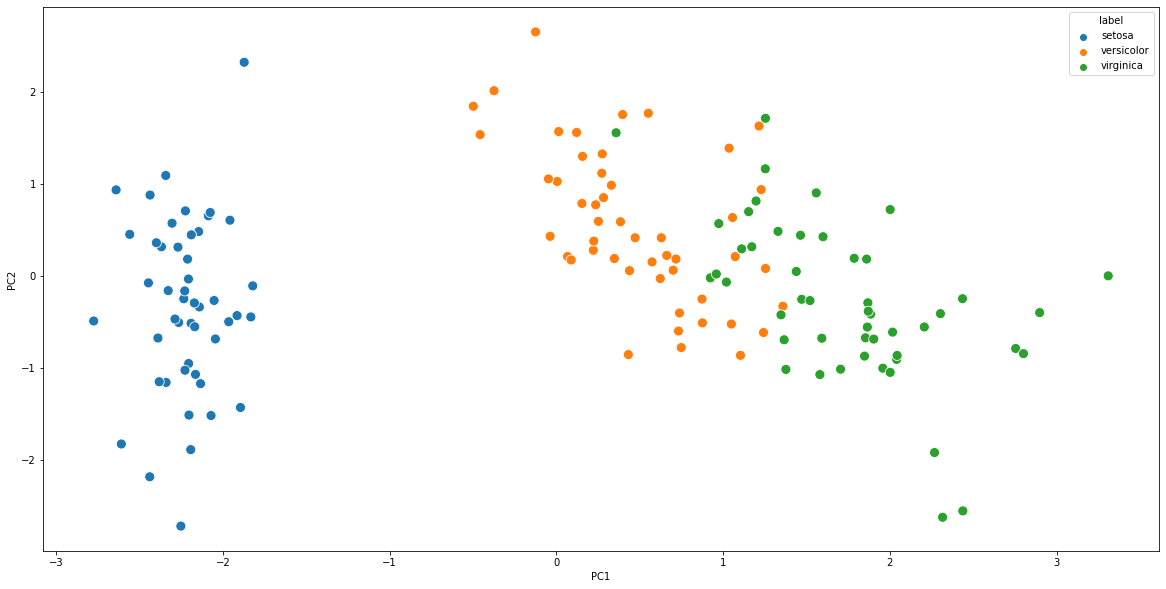

In [ ]:
# Projection on 2-dim subspace
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['label'], s=100)


Shortcut

In [10]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
projection = sklearn_pca.fit_transform(X, y=label)

sklearn_pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [11]:
sklearn_pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

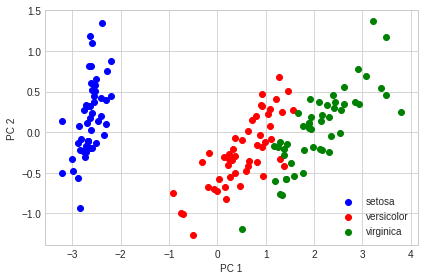

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(projection[label==lab, 0],
                    projection[label==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

[
Principal Component Analysis with numpy functions - v2](https://github.com/mwpnava/Data-Science-Projects/blob/master/PCA_numpy/PCA_with_numpy.ipynb), [Principal Component Analysis with NumPy](https://towardsdatascience.com/pca-with-numpy-58917c1d0391)